In [86]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


In [87]:
df = pd.read_csv(r"C:\Users\valem\Downloads\Weather\Weather Type Classification\weather_classification_data.csv")

In [88]:
df.head(10)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
5,32.0,55,3.5,26.0,overcast,1010.03,2,Summer,5.0,inland,Cloudy
6,-2.0,97,8.0,86.0,overcast,990.87,1,Winter,4.0,inland,Snowy
7,3.0,85,6.0,96.0,partly cloudy,984.46,1,Winter,3.5,inland,Snowy
8,3.0,83,6.0,66.0,overcast,999.44,0,Winter,1.0,mountain,Snowy
9,28.0,74,8.5,107.0,clear,1012.13,8,Winter,7.5,coastal,Sunny


Описание данных
Признаки:
Температура (числовая): температура в градусах Цельсия, варьирующаяся от экстремального холода до экстремальной жары.тип температуры. 
Влажность (числовая): Процент влажности, включая значения выше 100% для указания отклонений. 
Скорость ветра (числовая): Скорость ветра в километрах в час с диапазоном, включающим нереально высокие значения. 
Количество осадков (%) (числовая): процентное содержание осадков, включая значения выбросов. 
Облачный покров (категориальный): Описание облачного покрова. 
Атмосферное давление (числовое): Атмосферное давление в ГПа, охватывающее широкий диапазон. 
УФ-индекс (числовой): УФ-индекс, указывающий на интенсивность ультрафиолетового излучения. 
Сезон (категориальный): Сезон, в течение которого были записаны данные. 
Видимость (км) (числовая): Видимость в километрах, включая очень низкие или очень высокие значения. 
Местоположение (категориальное): Тип местоположения, в котором были записаны данные. 
Тип погоды (категориальное): Целевая переменная для классификации, указывающая тип погоды.

# Стадии решения задачи
подключение модулей (import modules)
загрузка данных (data lodaing)
разведочный анализ данных (exploratory data analysis, EDA)
предварительная обработка данных (preprocessing)
обучение моделей (models fitting)


Разведочный анализ данных

In [89]:
df.shape

(13200, 11)

In [90]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [91]:
df.isna

<bound method DataFrame.isna of        Temperature  Humidity  Wind Speed  Precipitation (%)    Cloud Cover  \
0             14.0        73         9.5               82.0  partly cloudy   
1             39.0        96         8.5               71.0  partly cloudy   
2             30.0        64         7.0               16.0          clear   
3             38.0        83         1.5               82.0          clear   
4             27.0        74        17.0               66.0       overcast   
...            ...       ...         ...                ...            ...   
13195         10.0        74        14.5               71.0       overcast   
13196         -1.0        76         3.5               23.0         cloudy   
13197         30.0        77         5.5               28.0       overcast   
13198          3.0        76        10.0               94.0       overcast   
13199         -5.0        38         0.0               92.0       overcast   

       Atmospheric Pressure  UV

In [92]:
for col in df.columns:
    print((col,df[col].isna().sum()))

('Temperature', 0)
('Humidity', 0)
('Wind Speed', 0)
('Precipitation (%)', 0)
('Cloud Cover', 0)
('Atmospheric Pressure', 0)
('UV Index', 0)
('Season', 0)
('Visibility (km)', 0)
('Location', 0)
('Weather Type', 0)


In [93]:
df.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [94]:
df.duplicated().sum()

0

In [95]:
df['Weather Type'].unique()

array(['Rainy', 'Cloudy', 'Sunny', 'Snowy'], dtype=object)

In [96]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [97]:
df['Temperature'].describe()

count    13200.000000
mean        19.127576
std         17.386327
min        -25.000000
25%          4.000000
50%         21.000000
75%         31.000000
max        109.000000
Name: Temperature, dtype: float64

In [98]:
df['Temperature'] = df['Temperature'].where(df['Temperature'] <= 59)
df['Atmospheric Pressure'] = df['Atmospheric Pressure'].where(df['Atmospheric Pressure'] <= 1083)

In [99]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,12975.000000,13200.000000,13200.000000,13200.000000,12844.000000,13200.000000,13200.000000
mean,18.209480,68.710833,9.832197,53.644394,1001.976904,4.005758,5.462917
std,15.999303,20.194248,6.908704,31.946541,29.038760,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.457500,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.010000,3.000000,5.000000
75%,30.000000,84.000000,13.500000,82.000000,1016.140000,7.000000,7.500000
max,59.000000,109.000000,48.500000,109.000000,1082.990000,14.000000,20.000000


array([[<Axes: title={'center': 'Temperature'}>,
        <Axes: title={'center': 'Humidity'}>,
        <Axes: title={'center': 'Wind Speed'}>],
       [<Axes: title={'center': 'Precipitation (%)'}>,
        <Axes: title={'center': 'Atmospheric Pressure'}>,
        <Axes: title={'center': 'UV Index'}>],
       [<Axes: title={'center': 'Visibility (km)'}>, <Axes: >, <Axes: >]],
      dtype=object)

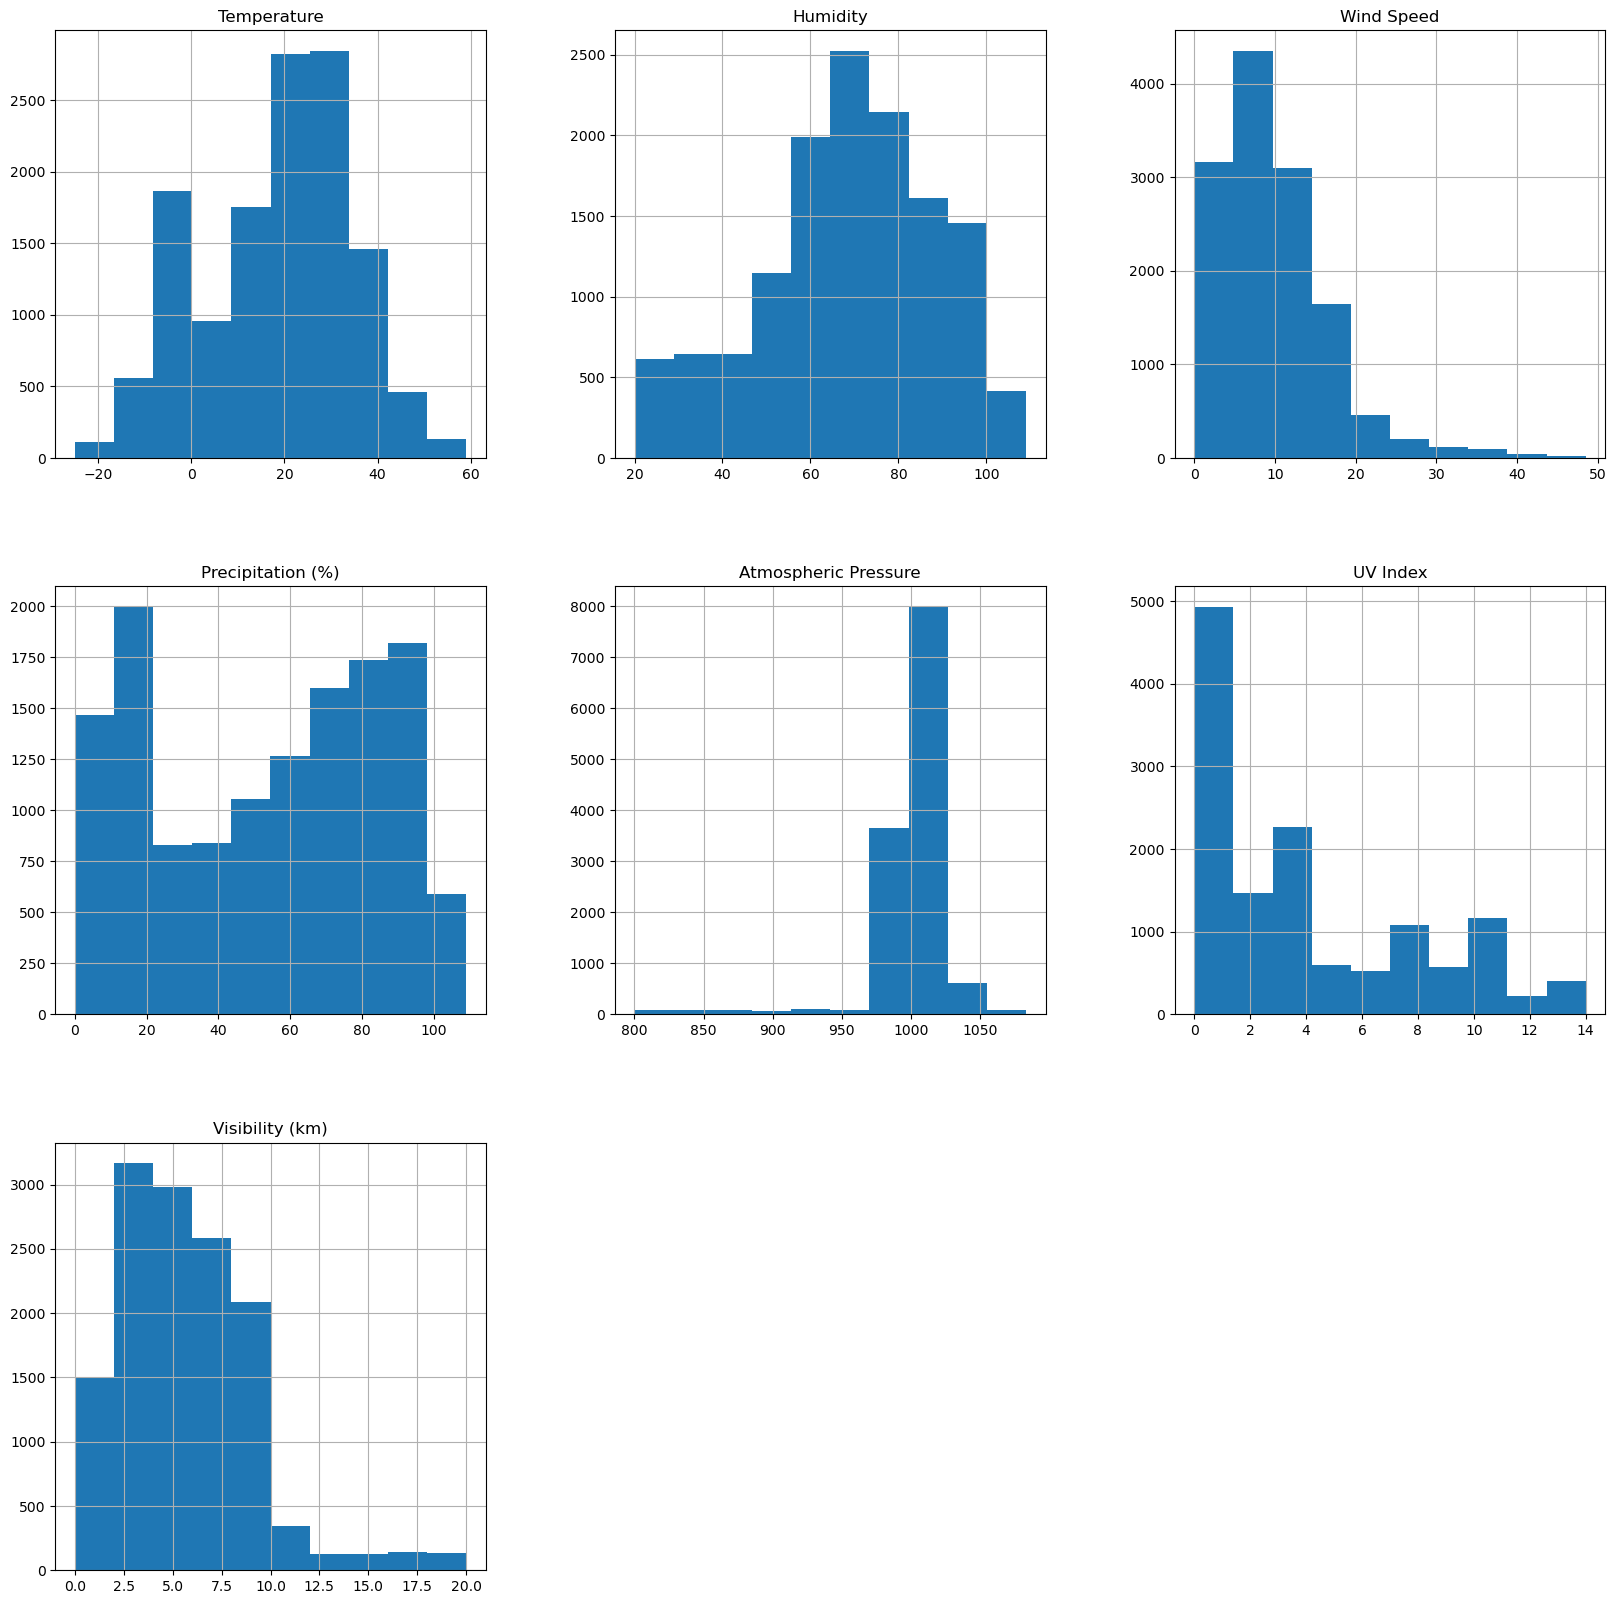

In [100]:
df.hist(figsize=(20,20))

<Axes: >

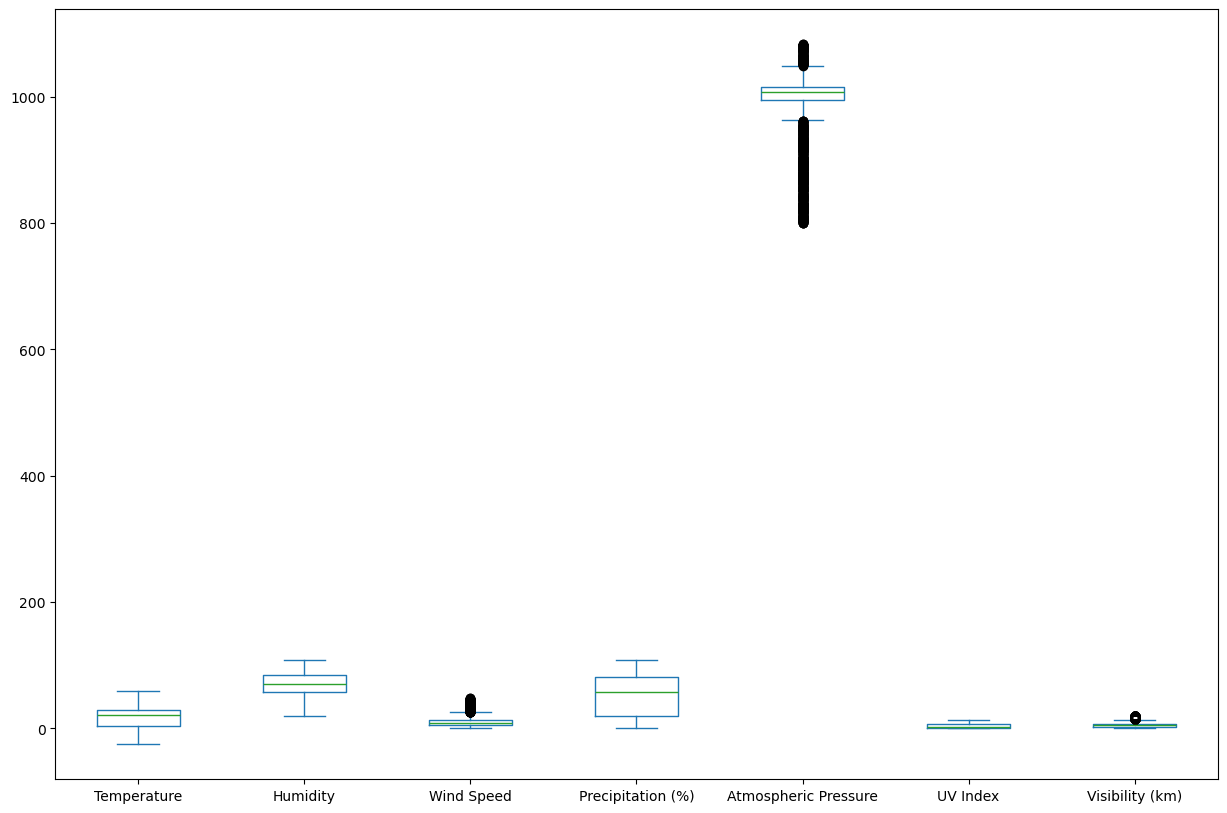

In [101]:
df.plot.box(figsize =(15,10))

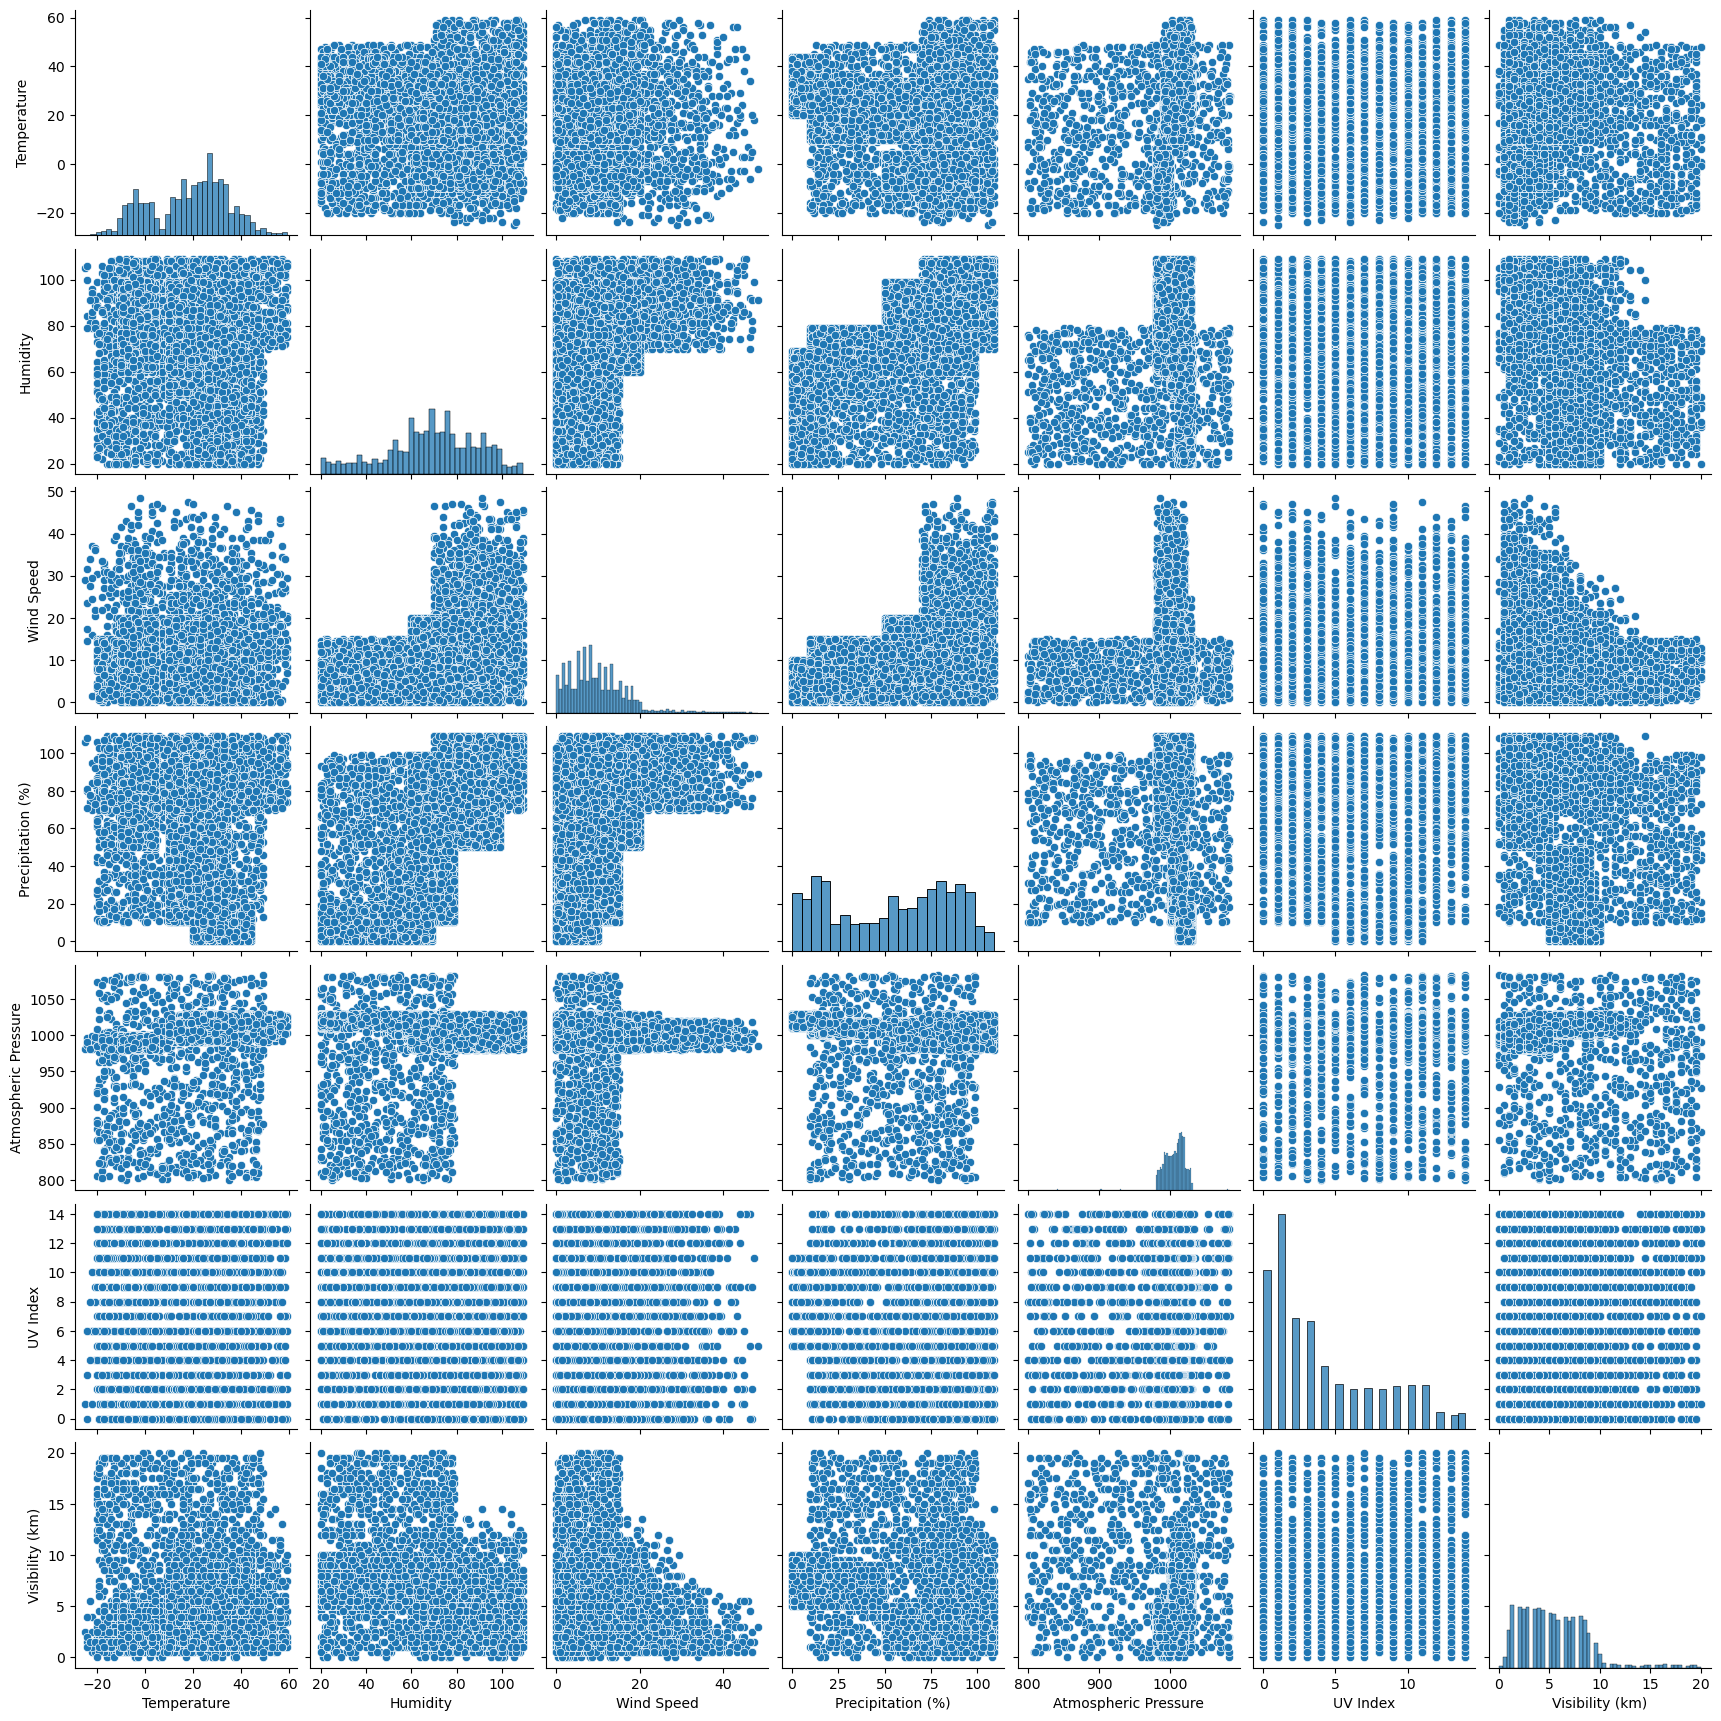

In [ ]:
sns.pairplot(data=df[['Temperature',"Humidity",	"Wind Speed","Precipitation (%)","Atmospheric Pressure","UV Index","Visibility (km)"]])

In [ ]:
df[['Temperature',"Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure","UV Index","Visibility (km)"]].corr()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
Temperature,1.000000,-0.289487,-0.117547,-0.386241,0.324686,0.369078,0.280687
Humidity,-0.289487,1.000000,0.406079,0.638631,-0.034792,-0.342694,-0.479969
Wind Speed,-0.117547,0.406079,1.000000,0.443770,-0.057845,-0.068147,-0.311828
Precipitation (%),-0.386241,0.638631,0.443770,1.000000,-0.233813,-0.291601,-0.457444
Atmospheric Pressure,0.324686,-0.034792,-0.057845,-0.233813,1.000000,0.088082,-0.016947
UV Index,0.369078,-0.342694,-0.068147,-0.291601,0.088082,1.000000,0.362922
Visibility (km),0.280687,-0.479969,-0.311828,-0.457444,-0.016947,0.362922,1.000000


<Axes: >

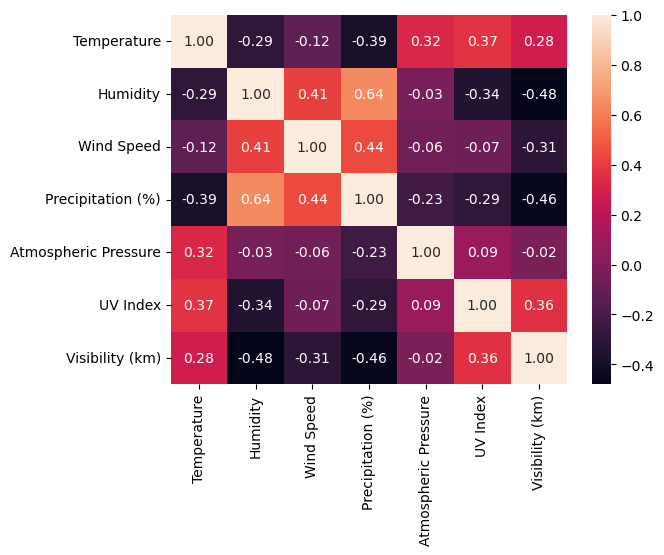

In [ ]:
sns.heatmap(df[['Temperature',"Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure","UV Index","Visibility (km)"]].corr(), annot=True, fmt=".2f")

Наблюдается зависимость межжду признаками: Атмосферным давлением и УФ-индексом,количество осадков и влажности

In [105]:

df['Weather Num'] = df['Weather Type']
d = {'Rainy':0, 'Cloudy':1, 'Sunny':2, 'Snowy':3}
df['Weather Num'] = df['Weather Num'].map(d)
df.head()


,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type,Weather Num
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy,0
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy,1
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny,2
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny,2
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy,0


In [ ]:
corr = df[['Temperature',"Humidity","Wind Speed","Precipitation (%)","Atmospheric Pressure","UV Index","Visibility (km)",'Weather Num']].corr()
corr

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Num
Temperature,1.000000,-0.289487,-0.117547,-0.386241,0.324686,0.369078,0.280687,-0.444625
Humidity,-0.289487,1.000000,0.406079,0.638631,-0.034792,-0.342694,-0.479969,-0.081860
Wind Speed,-0.117547,0.406079,1.000000,0.443770,-0.057845,-0.068147,-0.311828,-0.172076
Precipitation (%),-0.386241,0.638631,0.443770,1.000000,-0.233813,-0.291601,-0.457444,-0.055412
Atmospheric Pressure,0.324686,-0.034792,-0.057845,-0.233813,1.000000,0.088082,-0.016947,-0.124253
UV Index,0.369078,-0.342694,-0.068147,-0.291601,0.088082,1.000000,0.362922,0.058527
Visibility (km),0.280687,-0.479969,-0.311828,-0.457444,-0.016947,0.362922,1.000000,0.012547
Weather Num,-0.444625,-0.081860,-0.172076,-0.055412,-0.124253,0.058527,0.012547,1.000000


Замечаем что есть небольшая зависимость между влажностью и типом погоды

Обучение классификатора

<Axes: ylabel='proportion'>

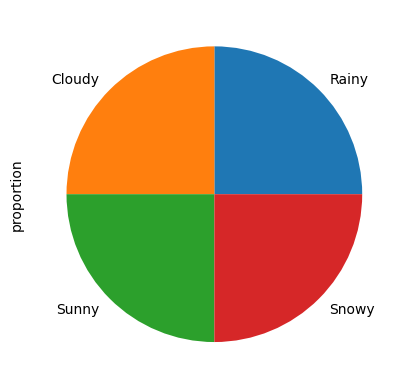

In [112]:
df['Weather Type'].value_counts(normalize=True).plot.pie()

<Axes: ylabel='Weather Num'>

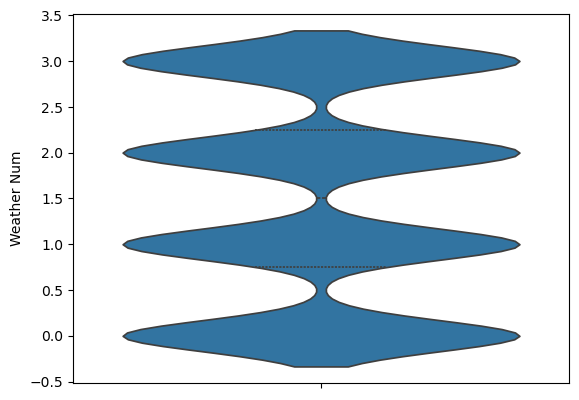

In [114]:
sns.violinplot(y=df['Weather Num'], inner='quartile')

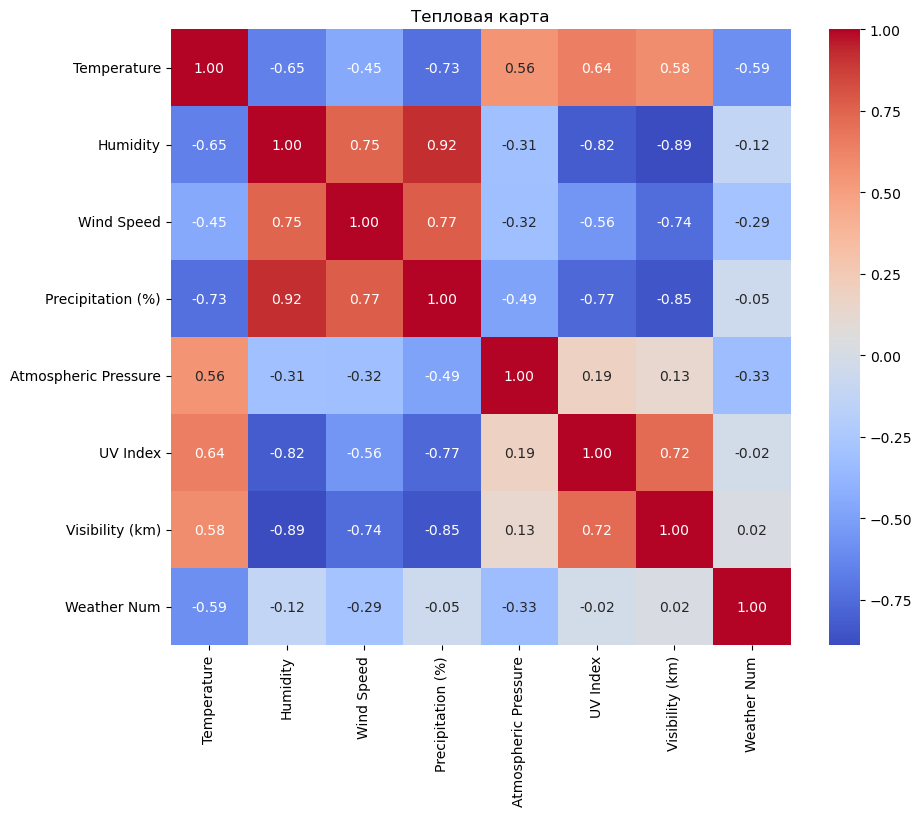

In [116]:
plt.figure(figsize=(10,8))
sns.heatmap(corr.corr(), annot=True,cmap='coolwarm', fmt='.2f')
plt.title('Тепловая карта')
plt.show()

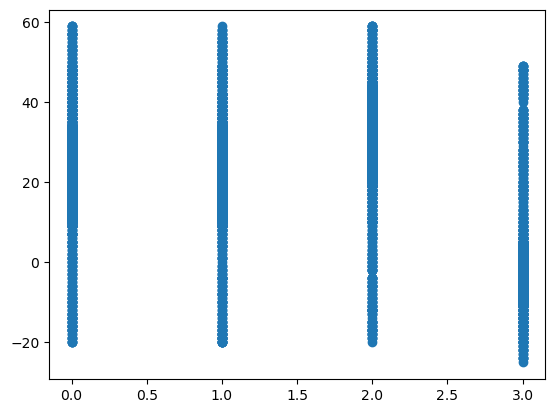

In [ ]:
plt.scatter(df['Weather Num'],df['Temperature'])



Чем день солнечный тем он жарче

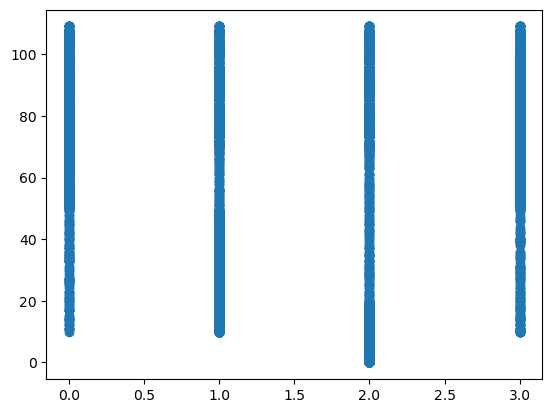

In [ ]:
plt.scatter(df['Weather Num'], df['Precipitation (%)'])

чем холоднее день тем более ниже влажность

In [143]:
df = df.dropna()

In [163]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
X = df[['Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)', 'Weather Num']]
y = df['Weather Num']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(8454, 7) (4165, 7) (8454,) (4165,)


In [164]:
X_train = X_train.dropna()
X_test = X_test.dropna()


Линейная модель

In [165]:
%%time
model = LinearRegression()
model.fit(X_train,y_train)

CPU times: total: 0 ns
Wall time: 8.16 ms


LinearRegression()

Альтернатива линейной модели

In [166]:
%%time
model = RandomForestRegressor()
model.fit(X_train, y_train)


CPU times: total: 328 ms
Wall time: 412 ms


RandomForestRegressor()

In [167]:
y_pred = model.predict(X_test)

In [168]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [ ]:
print(f"MAE: {mae}")
print(f"MQE: {mse}")
print(f"R^2 Score: {r2}")

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R^2 Score: 1.0


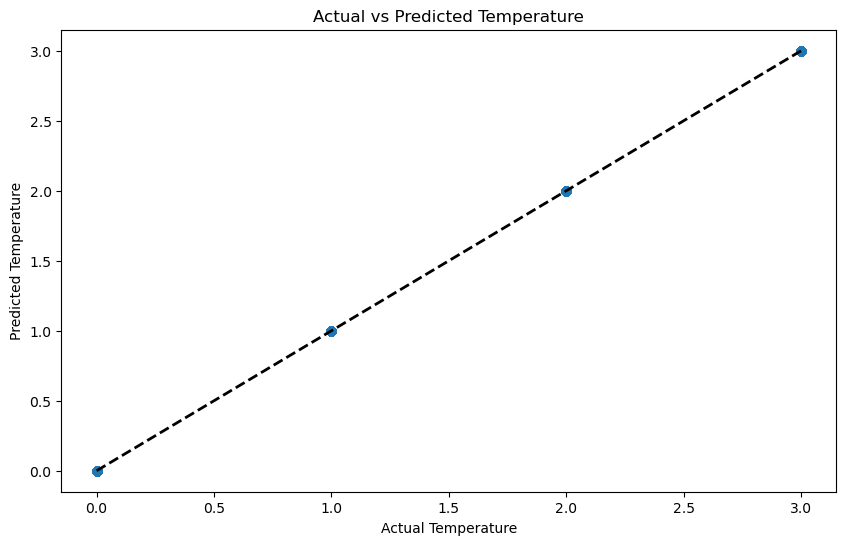

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Актуальная температура")
plt.ylabel("Прогнозируемая температура")
plt.title("Aктуальная против прогнозируемой температуры")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()


Вывод:

Модель линейной регрессии продемонстрировала базовый уровень точности в прогнозировании температуры на основе выбранных признаков.
Анализ коэффициентов линейной регрессии позволяет понять, какие погодные параметры наиболее сильно влияют на температуру, что может быть полезно для дальнейших исследований и интерпретации данных.
